In [1]:
import numpy as np
import graphlab
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

[INFO] graphlab.cython.cy_server: GraphLab Create v2.1 started. Logging: /tmp/graphlab_server_1512766075.log


This non-commercial license of GraphLab Create for academic use is assigned to tomasbielskis@gmail.com and will expire on December 07, 2018.


In [23]:
df = pd.read_table('data/ratings.dat')
df['ratebins'] = [int(x) for x in df.rating]
df_rating = graphlab.SFrame(df[["user_id", "joke_id", "rating"]])

In [142]:
dfj = pd.read_table('data/jester_ratings.dat')
del dfj['Unnamed: 1']
del dfj['Unnamed: 3']
dfj.columns = ['user_id', 'joke_id', 'rating']
dfj_rating = graphlab.SFrame(dfj)

dfj.head()


,user_id,joke_id,rating
0,1,7,-9.281
1,1,8,-9.281
2,1,13,-6.781
3,1,15,0.875
4,1,16,-9.656


In [3]:
df_jokes = pd.read_table('data/jokes.dat')
df_jokes['joke_id'], df_jokes['content'] = df_jokes['title'].str.split(':', 1).str
del df_jokes['title']

(array([ 44728.,  26857.,  26567.,  35139.,  37286.,  40209.,  43598.,
         45258.,  44245.,  58643.,  81532.,  93638.,  96034.,  91108.,
         85250.,  76666.,  69551.,  62613.,  69059.,  90344.]),
 array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
          1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.]),
 <a list of 20 Patch objects>)

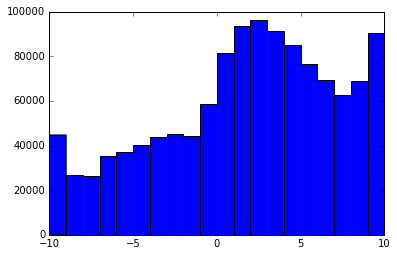

In [4]:
plt.hist(df.rating, bins=20)

In [144]:
rec = graphlab.recommender.factorization_recommender.create(
            dfj_rating,
            user_id='user_id',
            item_id='joke_id',
            target='rating',
#             regularization=0.00001,
            max_iterations=50
#             linear_regularization=0.000000000001,
#             solver='a',
#             nmf=False,
#             item_data=graphlab.SFrame(item_data)
)

Recsys training: model = factorization_recommender

Preparing data set.

Data has 1761438 observations with 59132 users and 140 items.

Data prepared in: 2.87734s

Training factorization_recommender for recommendations.

+--------------------------------+--------------------------------------------------+----------+

| Parameter                      | Description                                      | Value    |

+--------------------------------+--------------------------------------------------+----------+

| num_factors                    | Factor Dimension                                 | 8        |

| regularization                 | L2 Regularization on Factors                     | 1e-08    |

| solver                         | Solver used for training                         | sgd      |

| linear_regularization          | L2 Regularization on Linear Coefficients         | 1e-10    |

| max_iterations                 | Maximum Number of Iterations                     | 50       |

+--------------------------------+--------------------------------------------------+----------+

Optimizing model using SGD; tuning step size.

Using 220179 / 1761438 points for tuning the step size.

+---------+-------------------+------------------------------------------+

| Attempt | Initial Step Size | Estimated Objective Value                |

+---------+-------------------+------------------------------------------+

| 0       | 25                | No Decrease (236.326 >= 28.2108)         |

| 1       | 6.25              | No Decrease (215.555 >= 28.2108)         |

| 2       | 1.5625            | No Decrease (213.881 >= 28.2108)         |

| 3       | 0.390625          | No Decrease (113.555 >= 28.2108)         |

| 4       | 0.0976562         | 23.1715                                  |

| 5       | 0.0488281         | 20.6223                                  |

| 6       | 0.0244141         | 5.35057                                  |

| 7       | 0.012207          | 9.40199                                  |

| 8       | 0.00610352        | 16.3662                                  |

+---------+-------------------+------------------------------------------+

| Final   | 0.0244141         | 5.35057                                  |

+---------+-------------------+------------------------------------------+

Starting Optimization.

+---------+--------------+-------------------+-----------------------+-------------+

| Iter.   | Elapsed Time | Approx. Objective | Approx. Training RMSE | Step Size   |

+---------+--------------+-------------------+-----------------------+-------------+

| Initial | 10.174ms     | 28.1174           | 5.30258               |             |

+---------+--------------+-------------------+-----------------------+-------------+

| 1       | 843.454ms    | 21.8816           | 4.67737               | 0.0244141   |

| 2       | 1.55s        | 17.7648           | 4.21446               | 0.0145167   |

| 3       | 2.25s        | 15.6083           | 3.95037               | 0.0107102   |

| 4       | 2.97s        | 14.1845           | 3.76584               | 0.00863167  |

| 5       | 3.80s        | 13.2637           | 3.64153               | 0.00730151  |

| 6       | 4.51s        | 12.6792           | 3.56036               | 0.00636835  |

| 10      | 7.06s        | 11.6438           | 3.41183               | 0.0043415   |

| 11      | 7.76s        | 11.4894           | 3.38913               | 0.00404199  |

| 15      | 10.31s       | 11.2377           | 3.35177               | 0.00320311  |

| 20      | 14.57s       | 11.053            | 3.3241                | 0.00182538  |

| 25      | 17.88s       | 12.9465           | 3.59766               | 0.000194158 |

| 30      | 21.02s       | 13.9078           | 3.72887               | 9.5229e-06  |

| 35      | 24.19s       | 13.9167           | 3.73006               | 1.0667e-06  |

| 40      | 28.02s       | 13.9151           | 3.72985               | 9.65051e-07 |

| 45      | 31.25s       | 13.9138           | 3.72967               | 8.83458e-07 |

| 50      | 34.43s       | 13.9126           | 3.72951               | 8.16333e-07 |

+---------+--------------+-------------------+-----------------------+-------------+

Optimization Complete: Maximum number of passes through the data reached.

Computing final objective value and training RMSE.

Final objective value: 13.9124

Final training RMSE: 3.72948

In [146]:
rec_rank = graphlab.recommender.ranking_factorization_recommender.create(
          df_rating,
           user_id='user_id',
           item_id='joke_id',
           target='rating',  
#            item_data = graphlab.SFrame(item_data),
           max_iterations=50,
           ranking_regularization = 0.01)

Recsys training: model = ranking_factorization_recommender

Preparing data set.

Data has 1218325 observations with 50692 users and 141 items.

Data prepared in: 2.3316s

Training ranking_factorization_recommender for recommendations.

+--------------------------------+--------------------------------------------------+----------+

| Parameter                      | Description                                      | Value    |

+--------------------------------+--------------------------------------------------+----------+

| num_factors                    | Factor Dimension                                 | 32       |

| regularization                 | L2 Regularization on Factors                     | 1e-09    |

| solver                         | Solver used for training                         | sgd      |

| linear_regularization          | L2 Regularization on Linear Coefficients         | 1e-09    |

| ranking_regularization         | Rank-based Regularization Weight                 | 0.01     |

| max_iterations                 | Maximum Number of Iterations                     | 50       |

+--------------------------------+--------------------------------------------------+----------+

Optimizing model using SGD; tuning step size.

Using 152290 / 1218325 points for tuning the step size.

+---------+-------------------+------------------------------------------+

| Attempt | Initial Step Size | Estimated Objective Value                |

+---------+-------------------+------------------------------------------+

| 0       | 25                | Not Viable                               |

| 1       | 6.25              | Not Viable                               |

| 2       | 1.5625            | Not Viable                               |

| 3       | 0.390625          | Not Viable                               |

| 4       | 0.0976562         | Not Viable                               |

| 5       | 0.0244141         | 3.17892                                  |

| 6       | 0.012207          | 12.5909                                  |

+---------+-------------------+------------------------------------------+

| Final   | 0.0244141         | 3.17892                                  |

+---------+-------------------+------------------------------------------+

Starting Optimization.

+---------+--------------+-------------------+-----------------------+-------------+

| Iter.   | Elapsed Time | Approx. Objective | Approx. Training RMSE | Step Size   |

+---------+--------------+-------------------+-----------------------+-------------+

| Initial | 7.437ms      | 29.0129           | 5.28578               |             |

+---------+--------------+-------------------+-----------------------+-------------+

| 1       | 3.14s        | DIVERGED          | DIVERGED              | 0.0244141   |

| RESET   | 4.09s        | 29.0125           | 5.28575               |             |

| 1       | 5.89s        | 20.3998           | 4.39613               | 0.012207    |

| 2       | 7.63s        | 15.2912           | 3.7667                | 0.00725834  |

| 3       | 9.38s        | 10.5234           | 3.06575               | 0.00535512  |

| 4       | 11.11s       | 8.57371           | 2.72735               | 0.00431584  |

| 5       | 12.83s       | 7.5851            | 2.53793               | 0.00365075  |

| 6       | 14.60s       | 7.01072           | 2.42136               | 0.00318417  |

| 7       | 16.32s       | 6.64717           | 2.34396               | 0.00283652  |

| 8       | 18.07s       | 6.35165           | 2.27986               | 0.00256621  |

| 9       | 19.84s       | 6.15188           | 2.23558               | 0.00234924  |

| 10      | 21.57s       | 5.99352           | 2.19979               | 0.00217075  |

| 11      | 23.32s       | 5.83946           | 2.16435               | 0.002021    |

| 12      | 25.10s       | 5.75292           | 2.14434               | 0.00189332  |

| 13      | 26.91s       | 5.64415           | 2.11888               | 0.001783    |

| 14      | 28.70s       | 5.56505           | 2.10026               | 0.00168661  |

| 15      | 30.47s       | 5.49246           | 2.08293               | 0.00160155  |

| 16      | 32.22s       | 5.44305           | 2.07124               | 0.00152588  |

| 17      | 34.07s       | 5.37761           | 2.0555                | 0.00145805  |

| 18      | 35.84s       | 5.33546           | 2.04533               | 0.00139687  |

| 19      | 37.58s       | 5.27718           | 2.03175               | 0.00134136  |

| 20      | 39.39s       | 5.23757           | 2.02193               | 0.00129074  |

| 21      | 41.15s       | 5.20425           | 2.01391               | 0.00124436  |

| 22      | 42.89s       | 5.17612           | 2.00686               | 0.00120169  |

| 23      | 44.68s       | 5.14225           | 1.99869               | 0.00116229  |

| 24      | 46.44s       | 5.11565           | 1.99225               | 0.00112578  |

| 25      | 48.22s       | 5.08302           | 1.98438               | 0.00109183  |

| 26      | 49.97s       | 5.06567           | 1.98004               | 0.00106018  |

| 27      | 51.72s       | 5.03444           | 1.97285               | 0.00103059  |

| 28      | 53.47s       | 5.01782           | 1.96847               | 0.00100286  |

| 29      | 55.23s       | 4.99589           | 1.96309               | 0.000976813 |

| 30      | 56.99s       | 4.9741            | 1.95808               | 0.00095229  |

| 31      | 58.77s       | 4.96021           | 1.95471               | 0.000929156 |

| 32      | 1m 0s        | 4.94034           | 1.94967               | 0.000907293 |

| 33      | 1m 2s        | 4.92413           | 1.94577               | 0.000886594 |

| 34      | 1m 4s        | 4.90739           | 1.94175               | 0.000866964 |

| 35      | 1m 6s        | 4.88991           | 1.93757               | 0.000848319 |

| 36      | 1m 8s        | 4.88147           | 1.93537               | 0.000830583 |

| 37      | 1m 11s       | 4.86451           | 1.93164               | 0.00081369  |

| 38      | 1m 14s       | 4.85305           | 1.929                 | 0.000797577 |

| 39      | 1m 16s       | 4.84515           | 1.92649               | 0.000782189 |

| 40      | 1m 18s       | 4.82959           | 1.92298               | 0.000767476 |

| 41      | 1m 20s       | 4.81631           | 1.91991               | 0.000753394 |

| 42      | 1m 22s       | 4.80689           | 1.91729               | 0.0007399   |

| 43      | 1m 24s       | 4.79906           | 1.91576               | 0.000726957 |

| 44      | 1m 26s       | 4.7851            | 1.91227               | 0.00071453  |

| 45      | 1m 28s       | 4.77328           | 1.90923               | 0.000702588 |

| 46      | 1m 29s       | 4.76891           | 1.9084                | 0.000691101 |

| 47      | 1m 31s       | 4.75792           | 1.90579               | 0.000680043 |

| 48      | 1m 33s       | 4.74716           | 1.90285               | 0.00066939  |

| 49      | 1m 34s       | 4.73862           | 1.90125               | 0.000659118 |

| 50      | 1m 36s       | 4.73276           | 1.89972               | 0.000649206 |

+---------+--------------+-------------------+-----------------------+-------------+

Optimization Complete: Maximum number of passes through the data reached.

Computing final objective value and training RMSE.

Final objective value: 5.02398

Final training RMSE: 1.83737

In [12]:
predictions = rec.predict(df_rating)

In [13]:
predictions

dtype: float
Rows: 1218325
[-9.6663455238833, 4.352029578290891, 2.176064828417596, -2.1962987797301317, 2.150834846883666, 9.458341743109091, 2.169294975281912, 3.4023782679211405, 1.271953702795022, 10.563156510618454, 1.4232212213764612, 9.452161073154498, -9.498571679269627, -9.607740188727561, -9.754951590048728, -4.287012003532103, -9.81406045965668, 6.4492832103139515, -9.472855885803467, -3.3082735432018953, 1.4331004752586802, 4.338951835307287, -2.2560804796305263, 5.436656590264925, 8.701735132353727, 5.506809713807196, 8.572789413478812, 5.367318317339148, 6.837457953015441, -9.588656213625093, 1.2297659785198576, -7.640486542651948, 9.500594370762272, -5.379168346705521, -1.0752813692535126, 5.463116878926139, 1.3080675193670857, -0.9692910292839929, -3.2770620782040485, 7.533064278697417, -0.036211809347678675, 1.1703880847052013, 1.1470619803300375, 2.2268758674342926, 0.06586559884938409, -3.4105462692133037, 3.3212716844585213, 6.605249614602033, 1.0732460715459335, 5.

In [25]:
plt.figure(figsize=(12, 6))
data = [predictions[df_rating['ratebins'] == rate] for rate in range(-10, 11)]
plt.violinplot(data, range(-10,11), showmeans=True)
plt.show()

RuntimeError: Runtime Exception. Column name ratebins does not exist.

### NMF

In [82]:
from sklearn.feature_extraction.text import TfidfVectorizer
vecterizer = TfidfVectorizer()
vec_joke = vecterizer.fit_transform(df_jokes['content'])

In [95]:
from sklearn.decomposition import NMF
model = NMF(n_components=7, init='random', random_state=0)
W = model.fit_transform(vec_joke)
H = model.components_

In [96]:
item_data = pd.DataFrame(W)
item_data['joke_id']= item_data.index+1

### PCA

In [9]:
from sklearn.decomposition import PCA

pca = PCA(n_components=10)

### Submission

In [ ]:
sub_df = pd.read_csv('data/test_ratings.csv')
submission = pd.DataFrame({ '': sub_df['Id'],
                            'Survived': predictions })
submission.to_csv("submission.csv", index=False)

In [31]:
train_data, test_data = graphlab.recommender.util.random_split_by_user(df_rating,
            user_id='user_id',
            item_id='joke_id')

In [32]:
rec1 = graphlab.recommender.factorization_recommender.create(
            train_data,
            user_id='user_id',
            item_id='joke_id',
            target='rating',
            item_data=graphlab.SFrame(item_data))
rec2 = graphlab.recommender.factorization_recommender.create(
            train_data,
            user_id='user_id',
            item_id='joke_id',
            target='rating')

graphlab.recommender.util.compare_models(test_data, [rec1, rec2])

Recsys training: model = factorization_recommender

Preparing data set.

Data has 1213489 observations with 50692 users and 151 items.

Data prepared in: 2.1923s

Training factorization_recommender for recommendations.

+--------------------------------+--------------------------------------------------+----------+

| Parameter                      | Description                                      | Value    |

+--------------------------------+--------------------------------------------------+----------+

| num_factors                    | Factor Dimension                                 | 8        |

| regularization                 | L2 Regularization on Factors                     | 1e-08    |

| solver                         | Solver used for training                         | adagrad  |

| linear_regularization          | L2 Regularization on Linear Coefficients         | 1e-10    |

| side_data_factorization        | Assign Factors for Side Data                     | True     |

| max_iterations                 | Maximum Number of Iterations                     | 50       |

+--------------------------------+--------------------------------------------------+----------+

Optimizing model using SGD; tuning step size.

Using 151686 / 1213489 points for tuning the step size.

+---------+-------------------+------------------------------------------+

| Attempt | Initial Step Size | Estimated Objective Value                |

+---------+-------------------+------------------------------------------+

| 0       | 5.55556           | Not Viable                               |

| 1       | 1.38889           | Not Viable                               |

| 2       | 0.347222          | 17.4453                                  |

| 3       | 0.173611          | No Decrease (62.9348 >= 27.9247)         |

| 4       | 0.0434028         | 17.3002                                  |

| 5       | 0.0217014         | 21.0179                                  |

| 6       | 0.0108507         | 24.2596                                  |

| 7       | 0.00542535        | 26.1103                                  |

+---------+-------------------+------------------------------------------+

| Final   | 0.0434028         | 17.3002                                  |

+---------+-------------------+------------------------------------------+

Starting Optimization.

+---------+--------------+-------------------+-----------------------+-------------+

| Iter.   | Elapsed Time | Approx. Objective | Approx. Training RMSE | Step Size   |

+---------+--------------+-------------------+-----------------------+-------------+

| Initial | 8.826ms      | 27.9323           | 5.2851                |             |

+---------+--------------+-------------------+-----------------------+-------------+

| 1       | 1.44s        | 22.5673           | 4.75048               | 0.0434028   |

| 2       | 2.83s        | 40.5501           | 6.36785               | 0.0434028   |

| 3       | 4.45s        | DIVERGED          | DIVERGED              | 0.0434028   |

| RESET   | 4.82s        | 27.9324           | 5.28511               |             |

| 1       | 6.21s        | 23.7388           | 4.87224               | 0.0217014   |

| 2       | 7.61s        | 20.2892           | 4.50434               | 0.0217014   |

| 3       | 8.99s        | 19.2873           | 4.39172               | 0.0217014   |

| 4       | 10.34s       | 19.1104           | 4.37153               | 0.0217014   |

| 5       | 11.70s       | 19.423            | 4.40713               | 0.0217014   |

| 6       | 13.08s       | 20.5391           | 4.53199               | 0.0217014   |

| 7       | 14.47s       | 23.5597           | 4.85381               | 0.0217014   |

| 8       | 15.84s       | 31.627            | 5.62376               | 0.0217014   |

| 9       | 17.21s       | 51.0713           | 7.14639               | 0.0217014   |

| 10      | 18.76s       | DIVERGED          | DIVERGED              | 0.0217014   |

| RESET   | 19.11s       | 27.9323           | 5.28511               |             |

| 1       | 20.46s       | 25.3996           | 5.0398                | 0.0108507   |

| 2       | 22.17s       | 23.3559           | 4.83279               | 0.0108507   |

| 3       | 23.62s       | 22.2176           | 4.71355               | 0.0108507   |

| 4       | 25.39s       | 21.5248           | 4.63947               | 0.0108507   |

| 5       | 26.99s       | 21.126            | 4.59629               | 0.0108507   |

| 6       | 28.42s       | 20.9338           | 4.57534               | 0.0108507   |

| 7       | 30.08s       | 20.9037           | 4.57205               | 0.0108507   |

| 8       | 31.44s       | 21.0334           | 4.58621               | 0.0108507   |

| 9       | 32.82s       | 21.3548           | 4.62112               | 0.0108507   |

| 10      | 34.25s       | 21.912            | 4.68101               | 0.0108507   |

| 11      | 35.67s       | 22.8279           | 4.77784               | 0.0108507   |

| 12      | 37.01s       | 24.2416           | 4.92356               | 0.0108507   |

| 13      | 38.52s       | 26.4628           | 5.14418               | 0.0108507   |

| 14      | 40.12s       | 29.8223           | 5.46096               | 0.0108507   |

| 15      | 41.46s       | 34.8084           | 5.89985               | 0.0108507   |

| 16      | 42.80s       | 41.7332           | 6.4601                | 0.0108507   |

| 17      | 45.07s       | 50.9621           | 7.13875               | 0.0108507   |

| 18      | 46.72s       | DIVERGED          | DIVERGED              | 0.0108507   |

| RESET   | 47.10s       | 27.9323           | 5.2851                |             |

| 1       | 48.51s       | 26.5486           | 5.15253               | 0.00542535  |

| 2       | 49.88s       | 25.4068           | 5.04051               | 0.00542535  |

| 3       | 51.27s       | 24.7069           | 4.97061               | 0.00542535  |

| 4       | 52.65s       | 24.1808           | 4.9174                | 0.00542535  |

| 5       | 54.00s       | 23.7544           | 4.87384               | 0.00542535  |

| 6       | 55.44s       | 23.4026           | 4.83762               | 0.00542535  |

| 7       | 56.83s       | 23.1029           | 4.80654               | 0.00542535  |

| 8       | 58.21s       | 22.8427           | 4.7794                | 0.00542535  |

| 9       | 59.58s       | 22.6137           | 4.75538               | 0.00542535  |

| 10      | 1m 1s        | 22.4118           | 4.7341                | 0.00542535  |

| 11      | 1m 3s        | 22.2343           | 4.71532               | 0.00542535  |

| 12      | 1m 5s        | 22.0749           | 4.69839               | 0.00542535  |

| 13      | 1m 7s        | 21.933            | 4.68326               | 0.00542535  |

| 14      | 1m 8s        | 21.8064           | 4.66973               | 0.00542535  |

| 15      | 1m 10s       | 21.6933           | 4.6576                | 0.00542535  |

| 16      | 1m 12s       | 21.5944           | 4.64698               | 0.00542535  |

| 17      | 1m 13s       | 21.5056           | 4.6374                | 0.00542535  |

| 18      | 1m 15s       | 21.4265           | 4.62887               | 0.00542535  |

| 19      | 1m 16s       | 21.3587           | 4.62154               | 0.00542535  |

| 20      | 1m 18s       | 21.3007           | 4.61527               | 0.00542535  |

| 21      | 1m 19s       | 21.2524           | 4.61003               | 0.00542535  |

| 22      | 1m 20s       | 21.2135           | 4.6058                | 0.00542535  |

| 23      | 1m 22s       | 21.1846           | 4.60266               | 0.00542535  |

| 24      | 1m 23s       | 21.1655           | 4.60059               | 0.00542535  |

+---------+--------------+-------------------+-----------------------+-------------+

Optimization Complete: Maximum number of passes through the data reached (hard limit).

Computing final objective value and training RMSE.

Final objective value: 21.1524

Final training RMSE: 4.59917

Recsys training: model = factorization_recommender

Preparing data set.

Data has 1213489 observations with 50692 users and 141 items.

Data prepared in: 2.17867s

Training factorization_recommender for recommendations.

+--------------------------------+--------------------------------------------------+----------+

| Parameter                      | Description                                      | Value    |

+--------------------------------+--------------------------------------------------+----------+

| num_factors                    | Factor Dimension                                 | 8        |

| regularization                 | L2 Regularization on Factors                     | 1e-08    |

| solver                         | Solver used for training                         | sgd      |

| linear_regularization          | L2 Regularization on Linear Coefficients         | 1e-10    |

| max_iterations                 | Maximum Number of Iterations                     | 50       |

+--------------------------------+--------------------------------------------------+----------+

Optimizing model using SGD; tuning step size.

Using 151686 / 1213489 points for tuning the step size.

+---------+-------------------+------------------------------------------+

| Attempt | Initial Step Size | Estimated Objective Value                |

+---------+-------------------+------------------------------------------+

| 0       | 25                | No Decrease (223.584 >= 27.8836)         |

| 1       | 6.25              | No Decrease (195.398 >= 27.8836)         |

| 2       | 1.5625            | No Decrease (176.968 >= 27.8836)         |

| 3       | 0.390625          | No Decrease (95.3464 >= 27.8836)         |

| 4       | 0.0976562         | 21.6213                                  |

| 5       | 0.0488281         | 14.8656                                  |

| 6       | 0.0244141         | 3.28236                                  |

| 7       | 0.012207          | 10.5408                                  |

+---------+-------------------+------------------------------------------+

| Final   | 0.0244141         | 3.28236                                  |

+---------+-------------------+------------------------------------------+

Starting Optimization.

+---------+--------------+-------------------+-----------------------+-------------+

| Iter.   | Elapsed Time | Approx. Objective | Approx. Training RMSE | Step Size   |

+---------+--------------+-------------------+-----------------------+-------------+

| Initial | 10.071ms     | 27.9326           | 5.28513               |             |

+---------+--------------+-------------------+-----------------------+-------------+

| 1       | 590.5ms      | 21.6207           | 4.64949               | 0.0244141   |

| 2       | 1.03s        | 17.4347           | 4.17518               | 0.0145167   |

| 3       | 1.49s        | 15.1152           | 3.88751               | 0.0107102   |

| 4       | 1.96s        | 13.6138           | 3.68934               | 0.00863167  |

| 5       | 2.49s        | 12.7091           | 3.56462               | 0.00730151  |

| 6       | 3.06s        | 12.1672           | 3.48777               | 0.00636835  |

| 10      | 5.75s        | 11.1347           | 3.33646               | 0.0043415   |

| 11      | 6.21s        | 11.0397           | 3.32217               | 0.00404199  |

| 15      | 8.59s        | 10.7934           | 3.28489               | 0.00320311  |

| 20      | 11.36s       | 10.5746           | 3.25141               | 0.00217075  |

| 25      | 13.76s       | 11.5898           | 3.40396               | 0.000345267 |

| 30      | 16.79s       | 12.5309           | 3.53949               | 3.78664e-05 |

| 35      | 18.83s       | 12.5826           | 3.54678               | 1.41826e-05 |

| 40      | 20.93s       | 12.5862           | 3.5473                | 5.3948e-06  |

| 45      | 23.18s       | 12.5846           | 3.54707               | 2.46934e-06 |

| 50      | 25.95s       | 12.5824           | 3.54676               | 2.28172e-06 |

+---------+--------------+-------------------+-----------------------+-------------+

Optimization Complete: Maximum number of passes through the data reached.

Computing final objective value and training RMSE.

Final objective value: 12.5817

Final training RMSE: 3.54665

PROGRESS: Evaluate model M0

Precision and recall summary statistics by cutoff
+--------+-----------------+-----------------+
| cutoff |  mean_precision |   mean_recall   |
+--------+-----------------+-----------------+
|   1    | 0.0343680709534 | 0.0222099039172 |
|   2    | 0.0654101995565 | 0.0416696053874 |
|   3    | 0.0764966740576 | 0.0577688485153 |
|   4    | 0.0789911308204 | 0.0698912210673 |
|   5    | 0.0789356984479 | 0.0808874725463 |
|   6    | 0.0822246858832 | 0.0961156638946 |
|   7    | 0.0826734241368 |  0.111589591039 |
|   8    | 0.0852272727273 |  0.126635815164 |
|   9    | 0.0851194875585 |  0.140047090694 |
|   10   | 0.0849223946785 |  0.151872565217 |
+--------+-----------------+-----------------+
[10 rows x 3 columns]

('\nOverall RMSE: ', 4.70832838332647)

Per User RMSE (best)
+---------+-------+----------------+
| user_id | count |      rmse      |
+---------+-------+----------------+
|  24039  |   1   | 0.102818922506 |
+---------+-------+------------

[{'precision_recall_by_user': Columns:
  	user_id	int
  	cutoff	int
  	precision	float
  	recall	float
  	count	int
  
  Rows: 16236
  
  Data:
  +---------+--------+-----------+--------+-------+
  | user_id | cutoff | precision | recall | count |
  +---------+--------+-----------+--------+-------+
  |    21   |   1    |    0.0    |  0.0   |   12  |
  |    21   |   2    |    0.0    |  0.0   |   12  |
  |    21   |   3    |    0.0    |  0.0   |   12  |
  |    21   |   4    |    0.0    |  0.0   |   12  |
  |    21   |   5    |    0.0    |  0.0   |   12  |
  |    21   |   6    |    0.0    |  0.0   |   12  |
  |    21   |   7    |    0.0    |  0.0   |   12  |
  |    21   |   8    |    0.0    |  0.0   |   12  |
  |    21   |   9    |    0.0    |  0.0   |   12  |
  |    21   |   10   |    0.0    |  0.0   |   12  |
  +---------+--------+-----------+--------+-------+
  [16236 rows x 5 columns]
  Note: Only the head of the SFrame is printed.
  You can use print_rows(num_rows=m, num_columns=n) t

In [22]:
graphlab.recommender.util.compare_models(test_data, [rec1, rec2], metric='precision_recall')

PROGRESS: Evaluate model M0

Precision and recall summary statistics by cutoff
+--------+----------------+-----------------+
| cutoff | mean_precision |   mean_recall   |
+--------+----------------+-----------------+
|   1    | 0.208425720621 | 0.0688009836856 |
|   2    | 0.177937915743 |  0.109405781741 |
|   3    | 0.162601626016 |  0.13474367271  |
|   4    | 0.146341463415 |  0.157583389226 |
|   5    | 0.135476718404 |  0.175122049782 |
|   6    | 0.126016260163 |  0.187623575329 |
|   7    | 0.117991764333 |  0.197001282588 |
|   8    | 0.111141906874 |  0.207614820673 |
|   9    | 0.107908351811 |  0.22384258628  |
|   10   | 0.104101995565 |  0.234589303232 |
+--------+----------------+-----------------+
[10 rows x 3 columns]

PROGRESS: Evaluate model M1

Precision and recall summary statistics by cutoff
+--------+-----------------+-----------------+
| cutoff |  mean_precision |   mean_recall   |
+--------+-----------------+-----------------+
|   1    |  0.151884700665 | 0.046

[{'precision_recall_by_user': Columns:
  	user_id	int
  	cutoff	int
  	precision	float
  	recall	float
  	count	int
  
  Rows: 16236
  
  Data:
  +---------+--------+----------------+-----------------+-------+
  | user_id | cutoff |   precision    |      recall     | count |
  +---------+--------+----------------+-----------------+-------+
  |    21   |   1    |      1.0       | 0.0833333333333 |   12  |
  |    21   |   2    |      0.5       | 0.0833333333333 |   12  |
  |    21   |   3    | 0.666666666667 |  0.166666666667 |   12  |
  |    21   |   4    |      0.5       |  0.166666666667 |   12  |
  |    21   |   5    |      0.4       |  0.166666666667 |   12  |
  |    21   |   6    | 0.333333333333 |  0.166666666667 |   12  |
  |    21   |   7    | 0.285714285714 |  0.166666666667 |   12  |
  |    21   |   8    |      0.25      |  0.166666666667 |   12  |
  |    21   |   9    | 0.222222222222 |  0.166666666667 |   12  |
  |    21   |   10   |      0.2       |  0.166666666667 |   12  

In [145]:
sample_subl_df = pd.read_csv('data/sample_submission.csv')
sample_prediciton = rec.predict(graphlab.SFrame(sample_subl_df))
sample_subl_df['rating'] = sample_prediciton.to_numpy()
sample_subl_df.to_csv('data/submission_1.csv', index=False)

In [141]:
sample_subl_df.head()

,user_id,joke_id,rating
0,49541,113,5
1,39499,37,5
2,36804,73,5
3,16470,33,5
4,22614,128,5


In [43]:
sample_subl_df

,user_id,joke_id,rating
0,49541,113,3.512365
1,39499,37,1.909110
2,36804,73,4.493262
3,16470,33,5.520261
4,22614,128,4.843938
5,21787,54,6.658633
6,38999,115,1.895420
7,47214,90,2.545023
8,26710,137,1.456161
9,28308,54,8.320579


In [45]:
from nltk.tokenize import word_tokenize
from nltk.stem.snowball import SnowballStemmer

snowball = SnowballStemmer('english')

def tokenize(doc):
    return [snowball.stem(word) for word in word_tokenize(doc.lower())]

vecterizer = TfidfVectorizer(tokenizer=tokenize, stop_words='english')
vec_joke = vecterizer.fit_transform(df_jokes['content'])

In [63]:
regularization_vals = [0.00001, 0.000001, 0.0000001]
models = [graphlab.factorization_recommender.create(
            df_rating,
            user_id='user_id',
            item_id='joke_id',
            target='rating',
            item_data=graphlab.SFrame(item_data),
            max_iterations=100,
            regularization=0.00001)
          for r in regularization_vals]

Recsys training: model = factorization_recommender

Preparing data set.

Data has 1218325 observations with 50692 users and 151 items.

Data prepared in: 2.36037s

Training factorization_recommender for recommendations.

+--------------------------------+--------------------------------------------------+----------+

| Parameter                      | Description                                      | Value    |

+--------------------------------+--------------------------------------------------+----------+

| num_factors                    | Factor Dimension                                 | 8        |

| regularization                 | L2 Regularization on Factors                     | 1e-05    |

| solver                         | Solver used for training                         | adagrad  |

| linear_regularization          | L2 Regularization on Linear Coefficients         | 1e-10    |

| side_data_factorization        | Assign Factors for Side Data                     | True     |

| max_iterations                 | Maximum Number of Iterations                     | 100      |

+--------------------------------+--------------------------------------------------+----------+

Optimizing model using SGD; tuning step size.

Using 152290 / 1218325 points for tuning the step size.

+---------+-------------------+------------------------------------------+

| Attempt | Initial Step Size | Estimated Objective Value                |

+---------+-------------------+------------------------------------------+

| 0       | 5.55556           | Not Viable                               |

| 1       | 1.38889           | 5.66817                                  |

| 2       | 0.694444          | Not Viable                               |

| 3       | 0.173611          | No Decrease (30.2163 >= 27.9932)         |

| 4       | 0.0434028         | 16.6882                                  |

+---------+-------------------+------------------------------------------+

| Final   | 1.38889           | 5.66817                                  |

+---------+-------------------+------------------------------------------+

Starting Optimization.

+---------+--------------+-------------------+-----------------------+-------------+

| Iter.   | Elapsed Time | Approx. Objective | Approx. Training RMSE | Step Size   |

+---------+--------------+-------------------+-----------------------+-------------+

| Initial | 8.678ms      | 27.9392           | 5.28576               |             |

+---------+--------------+-------------------+-----------------------+-------------+

| 1       | 1.78s        | 19.3323           | 4.36661               | 1.38889     |

| 2       | 3.16s        | 17.418            | 4.01316               | 1.38889     |

| 3       | 4.98s        | 15.2183           | 3.63223               | 1.38889     |

| 4       | 6.32s        | 13.6456           | 3.37986               | 1.38889     |

| 5       | 7.68s        | 12.9737           | 3.27935               | 1.38889     |

| 6       | 9.00s        | 12.6086           | 3.22725               | 1.38889     |

| 7       | 10.26s       | 12.3487           | 3.19473               | 1.38889     |

| 8       | 11.57s       | 12.1172           | 3.16798               | 1.38889     |

| 9       | 12.94s       | 11.9748           | 3.15381               | 1.38889     |

| 10      | 14.25s       | 11.838            | 3.14444               | 1.38889     |

| 11      | 15.57s       | 11.7135           | 3.13302               | 1.38889     |

| 12      | 17.07s       | 11.6145           | 3.1261                | 1.38889     |

| 13      | 18.36s       | 11.5194           | 3.11771               | 1.38889     |

| 14      | 19.71s       | 11.4256           | 3.11221               | 1.38889     |

| 15      | 21.05s       | 11.3507           | 3.10704               | 1.38889     |

| 16      | 22.42s       | 11.2791           | 3.10281               | 1.38889     |

| 17      | 23.71s       | 11.2144           | 3.09842               | 1.38889     |

| 18      | 25.39s       | 11.1577           | 3.09536               | 1.38889     |

| 19      | 26.78s       | 11.0995           | 3.09123               | 1.38889     |

| 20      | 28.05s       | 11.0581           | 3.0908                | 1.38889     |

| 21      | 29.55s       | 11.0096           | 3.08768               | 1.38889     |

| 22      | 31.05s       | 10.9634           | 3.08374               | 1.38889     |

| 23      | 32.36s       | 10.9271           | 3.08362               | 1.38889     |

| 24      | 33.68s       | 10.8781           | 3.07924               | 1.38889     |

| 25      | 35.00s       | 10.8384           | 3.07726               | 1.38889     |

| 26      | 36.31s       | 10.8118           | 3.07621               | 1.38889     |

| 27      | 37.75s       | 10.7857           | 3.07569               | 1.38889     |

| 28      | 39.33s       | 10.7514           | 3.07308               | 1.38889     |

| 29      | 40.70s       | 10.7232           | 3.07145               | 1.38889     |

| 30      | 41.97s       | 10.7018           | 3.07152               | 1.38889     |

| 31      | 43.30s       | 10.6702           | 3.06966               | 1.38889     |

| 32      | 44.58s       | 10.643            | 3.06736               | 1.38889     |

| 33      | 45.83s       | 10.6171           | 3.06558               | 1.38889     |

| 34      | 47.08s       | 10.5971           | 3.0653                | 1.38889     |

| 35      | 48.43s       | 10.573            | 3.06405               | 1.38889     |

| 36      | 49.71s       | 10.5528           | 3.06308               | 1.38889     |

| 37      | 50.97s       | 10.5345           | 3.06196               | 1.38889     |

| 38      | 52.24s       | 10.511            | 3.05981               | 1.38889     |

| 39      | 53.60s       | 10.496            | 3.0599                | 1.38889     |

| 40      | 54.93s       | 10.483            | 3.05944               | 1.38889     |

| 41      | 56.30s       | 10.4664           | 3.0583                | 1.38889     |

| 42      | 57.60s       | 10.4474           | 3.05655               | 1.38889     |

| 43      | 58.91s       | 10.4298           | 3.0561                | 1.38889     |

| 44      | 1m 0s        | 10.42             | 3.05531               | 1.38889     |

| 45      | 1m 1s        | 10.401            | 3.05466               | 1.38889     |

| 46      | 1m 3s        | 10.3882           | 3.05338               | 1.38889     |

| 47      | 1m 4s        | 10.3759           | 3.05326               | 1.38889     |

| 48      | 1m 6s        | 10.3635           | 3.05235               | 1.38889     |

| 49      | 1m 7s        | 10.3455           | 3.05074               | 1.38889     |

| 50      | 1m 9s        | 10.328            | 3.04909               | 1.38889     |

| 51      | 1m 10s       | 10.3134           | 3.04837               | 1.38889     |

| 52      | 1m 11s       | 10.3125           | 3.04871               | 1.38889     |

| 53      | 1m 13s       | 10.3052           | 3.04886               | 1.38889     |

| 54      | 1m 15s       | 10.2841           | 3.04628               | 1.38889     |

| 55      | 1m 17s       | 10.2846           | 3.04803               | 1.38889     |

| 56      | 1m 19s       | 10.2668           | 3.04593               | 1.38889     |

| 57      | 1m 21s       | 10.2509           | 3.04462               | 1.38889     |

| 58      | 1m 23s       | 10.2488           | 3.04494               | 1.38889     |

| 59      | 1m 25s       | 10.2402           | 3.04512               | 1.38889     |

| 60      | 1m 27s       | 10.2277           | 3.04363               | 1.38889     |

| 61      | 1m 29s       | 10.2162           | 3.04233               | 1.38889     |

| 62      | 1m 31s       | 10.2045           | 3.04097               | 1.38889     |

| 63      | 1m 33s       | 10.2055           | 3.04295               | 1.38889     |

| 64      | 1m 35s       | 10.193            | 3.04122               | 1.38889     |

| 65      | 1m 36s       | 10.1794           | 3.04029               | 1.38889     |

| 66      | 1m 38s       | 10.1705           | 3.03887               | 1.38889     |

| 67      | 1m 39s       | 10.1742           | 3.0405                | 1.38889     |

| 68      | 1m 41s       | 10.156            | 3.03864               | 1.38889     |

| 69      | 1m 42s       | 10.1518           | 3.03822               | 1.38889     |

| 70      | 1m 44s       | 10.1477           | 3.03871               | 1.38889     |

| 71      | 1m 47s       | 10.1365           | 3.03717               | 1.38889     |

| 72      | 1m 48s       | 10.1294           | 3.03654               | 1.38889     |

| 73      | 1m 49s       | 10.1244           | 3.03672               | 1.38889     |

| 74      | 1m 51s       | 10.1168           | 3.03597               | 1.38889     |

| 75      | 1m 52s       | 10.1019           | 3.03411               | 1.38889     |

| 76      | 1m 54s       | 10.1037           | 3.03519               | 1.38889     |

| 77      | 1m 56s       | 10.0914           | 3.03384               | 1.38889     |

| 78      | 1m 57s       | 10.0787           | 3.03259               | 1.38889     |

| 79      | 1m 59s       | 10.0845           | 3.03353               | 1.38889     |

| 80      | 2m 0s        | 10.0776           | 3.03336               | 1.38889     |

| 81      | 2m 1s        | 10.0688           | 3.0324                | 1.38889     |

| 82      | 2m 3s        | 10.0599           | 3.03163               | 1.38889     |

| 83      | 2m 4s        | 10.0536           | 3.03101               | 1.38889     |

| 84      | 2m 5s        | 10.0495           | 3.03044               | 1.38889     |

| 85      | 2m 8s        | 10.0426           | 3.03022               | 1.38889     |

| 86      | 2m 9s        | 10.0335           | 3.0294                | 1.38889     |

| 87      | 2m 10s       | 10.0353           | 3.02917               | 1.38889     |

| 88      | 2m 12s       | 10.0314           | 3.02952               | 1.38889     |

| 89      | 2m 13s       | 10.0253           | 3.02861               | 1.38889     |

| 90      | 2m 14s       | 10.017            | 3.02838               | 1.38889     |

| 91      | 2m 16s       | 10.0126           | 3.02755               | 1.38889     |

| 92      | 2m 17s       | 10.009            | 3.02773               | 1.38889     |

| 93      | 2m 19s       | 9.99881           | 3.02631               | 1.38889     |

| 94      | 2m 20s       | 9.99797           | 3.0267                | 1.38889     |

| 95      | 2m 22s       | 9.9895            | 3.02542               | 1.38889     |

| 96      | 2m 23s       | 9.99116           | 3.02617               | 1.38889     |

| 97      | 2m 24s       | 9.98576           | 3.02542               | 1.38889     |

| 98      | 2m 26s       | 9.98008           | 3.02526               | 1.38889     |

| 99      | 2m 27s       | 9.97532           | 3.02497               | 1.38889     |

| 100     | 2m 29s       | 9.96956           | 3.02422               | 1.38889     |

+---------+--------------+-------------------+-----------------------+-------------+

Optimization Complete: Maximum number of passes through the data reached.

Computing final objective value and training RMSE.

Final objective value: 9.41989

Final training RMSE: 2.93194

Recsys training: model = factorization_recommender

Preparing data set.

Data has 1218325 observations with 50692 users and 151 items.

Data prepared in: 2.87039s

Training factorization_recommender for recommendations.

+--------------------------------+--------------------------------------------------+----------+

| Parameter                      | Description                                      | Value    |

+--------------------------------+--------------------------------------------------+----------+

| num_factors                    | Factor Dimension                                 | 8        |

| regularization                 | L2 Regularization on Factors                     | 1e-06    |

| solver                         | Solver used for training                         | adagrad  |

| linear_regularization          | L2 Regularization on Linear Coefficients         | 1e-10    |

| side_data_factorization        | Assign Factors for Side Data                     | True     |

| max_iterations                 | Maximum Number of Iterations                     | 100      |

+--------------------------------+--------------------------------------------------+----------+

Optimizing model using SGD; tuning step size.

Using 152290 / 1218325 points for tuning the step size.

+---------+-------------------+------------------------------------------+

| Attempt | Initial Step Size | Estimated Objective Value                |

+---------+-------------------+------------------------------------------+

| 0       | 5.55556           | Not Viable                               |

| 1       | 1.38889           | 8.0524                                   |

| 2       | 0.694444          | 3.90198                                  |

| 3       | 0.347222          | 20.5713                                  |

+---------+-------------------+------------------------------------------+

| Final   | 0.694444          | 3.90198                                  |

+---------+-------------------+------------------------------------------+

Starting Optimization.

+---------+--------------+-------------------+-----------------------+-------------+

| Iter.   | Elapsed Time | Approx. Objective | Approx. Training RMSE | Step Size   |

+---------+--------------+-------------------+-----------------------+-------------+

| Initial | 9.76ms       | 27.9392           | 5.28576               |             |

+---------+--------------+-------------------+-----------------------+-------------+

| 1       | 1.67s        | 18.8528           | 4.31452               | 0.694444    |

| 2       | 3.38s        | 14.6829           | 3.79425               | 0.694444    |

| 3       | 4.98s        | 13.0229           | 3.56637               | 0.694444    |

| 4       | 6.70s        | 12.1052           | 3.43339               | 0.694444    |

| 5       | 8.22s        | 11.6102           | 3.35987               | 0.694444    |

| 6       | 9.82s        | 11.2455           | 3.30441               | 0.694444    |

| 7       | 11.39s       | 10.9833           | 3.26393               | 0.694444    |

| 8       | 12.98s       | 10.7874           | 3.23347               | 0.694444    |

| 9       | 14.78s       | 10.6577           | 3.21305               | 0.694444    |

| 10      | 16.46s       | 10.5551           | 3.19699               | 0.694444    |

| 11      | 18.05s       | 10.4565           | 3.18132               | 0.694444    |

| 12      | 19.75s       | 10.3942           | 3.17141               | 0.694444    |

| 13      | 21.33s       | 10.3174           | 3.15915               | 0.694444    |

| 14      | 22.75s       | 10.2562           | 3.14942               | 0.694444    |

| 15      | 24.42s       | 10.2077           | 3.14166               | 0.694444    |

| 16      | 26.24s       | 10.1636           | 3.13463               | 0.694444    |

| 17      | 27.66s       | 10.1207           | 3.12773               | 0.694444    |

| 18      | 29.24s       | 10.0854           | 3.12208               | 0.694444    |

| 19      | 30.85s       | 10.0454           | 3.11562               | 0.694444    |

| 20      | 32.44s       | 10.0232           | 3.1121                | 0.694444    |

| 21      | 35.12s       | 9.99248           | 3.10715               | 0.694444    |

| 22      | 36.97s       | 9.95731           | 3.10145               | 0.694444    |

| 23      | 38.78s       | 9.94825           | 3.10004               | 0.694444    |

| 24      | 40.64s       | 9.91354           | 3.09442               | 0.694444    |

| 25      | 42.22s       | 9.88768           | 3.09028               | 0.694444    |

| 26      | 43.97s       | 9.87076           | 3.08752               | 0.694444    |

| 27      | 45.39s       | 9.8612            | 3.08598               | 0.694444    |

| 28      | 46.81s       | 9.84681           | 3.08359               | 0.694444    |

| 29      | 48.21s       | 10.1365           | 3.12976               | 0.694444    |

| 30      | 50.03s       | DIVERGED          | DIVERGED              | 0.694444    |

| RESET   | 50.41s       | 27.9392           | 5.28575               |             |

| 1       | 52.08s       | DIVERGED          | DIVERGED              | 0.347222    |

| RESET   | 52.47s       | 27.9391           | 5.28574               |             |

| 1       | 54.09s       | DIVERGED          | DIVERGED              | 0.173611    |

| RESET   | 54.46s       | 27.9392           | 5.28575               |             |

| 1       | 56.12s       | DIVERGED          | DIVERGED              | 0.0868056   |

| RESET   | 56.53s       | 27.9392           | 5.28576               |             |

| 1       | 57.96s       | 30.5454           | 5.52357               | 0.0434028   |

| 2       | 59.55s       | DIVERGED          | DIVERGED              | 0.0434028   |

| RESET   | 1m 0s        | 27.9391           | 5.28574               |             |

| 1       | 1m 2s        | 24.2679           | 4.92565               | 0.0217014   |

| 2       | 1m 4s        | 23.6874           | 4.86566               | 0.0217014   |

| 3       | 1m 5s        | 28.9047           | 5.37406               | 0.0217014   |

| 4       | 1m 7s        | 43.0092           | 6.55509               | 0.0217014   |

| 5       | 1m 9s        | DIVERGED          | DIVERGED              | 0.0217014   |

| RESET   | 1m 10s       | 27.9391           | 5.28575               |             |

| 1       | 1m 11s       | 25.5126           | 5.05088               | 0.0108507   |

| 2       | 1m 12s       | 23.5298           | 4.85051               | 0.0108507   |

| 3       | 1m 14s       | 22.3149           | 4.72349               | 0.0108507   |

| 4       | 1m 16s       | 21.5044           | 4.6368                | 0.0108507   |

| 5       | 1m 18s       | 20.9604           | 4.57767               | 0.0108507   |

| 6       | 1m 20s       | 20.5888           | 4.53682               | 0.0108507   |

| 7       | 1m 21s       | 20.3393           | 4.50917               | 0.0108507   |

| 8       | 1m 23s       | 20.1795           | 4.49135               | 0.0108507   |

| 9       | 1m 24s       | 20.0967           | 4.48204               | 0.0108507   |

| 10      | 1m 25s       | 20.0777           | 4.47986               | 0.0108507   |

| 11      | 1m 27s       | 20.1303           | 4.48564               | 0.0108507   |

| 12      | 1m 28s       | 20.2591           | 4.4999                | 0.0108507   |

| 13      | 1m 30s       | 20.4847           | 4.52479               | 0.0108507   |

| 14      | 1m 31s       | 20.8352           | 4.56325               | 0.0108507   |

| 15      | 1m 32s       | 21.3508           | 4.61928               | 0.0108507   |

| 16      | 1m 34s       | 22.1092           | 4.7005                | 0.0108507   |

| 17      | 1m 35s       | 23.1908           | 4.81401               | 0.0108507   |

| 18      | 1m 37s       | 24.7309           | 4.97119               | 0.0108507   |

| 19      | 1m 38s       | 26.9667           | 5.19095               | 0.0108507   |

| 20      | 1m 39s       | 30.1441           | 5.48819               | 0.0108507   |

| 21      | 1m 41s       | 34.502            | 5.87149               | 0.0108507   |

| 22      | 1m 42s       | 40.2944           | 6.34528               | 0.0108507   |

| 23      | 1m 44s       | 47.4319           | 6.88441               | 0.0108507   |

| 24      | 1m 45s       | DIVERGED          | DIVERGED              | 0.0108507   |

| RESET   | 1m 46s       | 27.9391           | 5.28574               |             |

| 1       | 1m 47s       | 26.5119           | 5.14893               | 0.00542535  |

| 2       | 1m 49s       | 25.3795           | 5.03774               | 0.00542535  |

| 3       | 1m 50s       | 24.7121           | 4.97102               | 0.00542535  |

| 4       | 1m 51s       | 24.1857           | 4.91776               | 0.00542535  |

| 5       | 1m 53s       | 23.7649           | 4.87476               | 0.00542535  |

| 6       | 1m 54s       | 23.4144           | 4.83865               | 0.00542535  |

| 7       | 1m 55s       | 23.112            | 4.80727               | 0.00542535  |

| 8       | 1m 57s       | 22.8487           | 4.77977               | 0.00542535  |

| 9       | 1m 58s       | 22.6178           | 4.75554               | 0.00542535  |

| 10      | 2m 0s        | 22.4126           | 4.73389               | 0.00542535  |

| 11      | 2m 1s        | 22.23             | 4.71454               | 0.00542535  |

| 12      | 2m 2s        | 22.0666           | 4.69716               | 0.00542535  |

| 13      | 2m 4s        | 21.9216           | 4.68168               | 0.00542535  |

| 14      | 2m 5s        | 21.7909           | 4.66768               | 0.00542535  |

| 15      | 2m 7s        | 21.6743           | 4.65516               | 0.00542535  |

| 16      | 2m 8s        | 21.5699           | 4.64391               | 0.00542535  |

| 17      | 2m 9s        | 21.4767           | 4.63384               | 0.00542535  |

| 18      | 2m 11s       | 21.3941           | 4.62491               | 0.00542535  |

| 19      | 2m 12s       | 21.3213           | 4.61701               | 0.00542535  |

| 20      | 2m 14s       | 21.2584           | 4.61017               | 0.00542535  |

| 21      | 2m 15s       | 21.2045           | 4.6043                | 0.00542535  |

| 22      | 2m 16s       | 21.1595           | 4.5994                | 0.00542535  |

| 23      | 2m 18s       | 21.1247           | 4.59559               | 0.00542535  |

| 24      | 2m 19s       | 21.0977           | 4.59263               | 0.00542535  |

| 25      | 2m 21s       | 21.0806           | 4.59076               | 0.00542535  |

| 26      | 2m 22s       | 21.0746           | 4.59008               | 0.00542535  |

| 27      | 2m 23s       | 21.0804           | 4.59069               | 0.00542535  |

| 28      | 2m 25s       | 21.0974           | 4.59251               | 0.00542535  |

| 29      | 2m 26s       | 21.1287           | 4.5959                | 0.00542535  |

| 30      | 2m 28s       | 21.1762           | 4.60103               | 0.00542535  |

| 31      | 2m 29s       | 21.2417           | 4.60812               | 0.00542535  |

| 32      | 2m 30s       | 21.33             | 4.61765               | 0.00542535  |

| 33      | 2m 32s       | 21.4417           | 4.6297                | 0.00542535  |

| 34      | 2m 33s       | 21.586            | 4.64522               | 0.00542535  |

| 35      | 2m 35s       | 21.7645           | 4.66435               | 0.00542535  |

| 36      | 2m 37s       | 21.9918           | 4.68861               | 0.00542535  |

| 37      | 2m 39s       | 22.2736           | 4.71851               | 0.00542535  |

| 38      | 2m 41s       | 22.6293           | 4.756                 | 0.00542535  |

| 39      | 2m 42s       | 23.0716           | 4.80221               | 0.00542535  |

| 40      | 2m 44s       | 23.6247           | 4.85938               | 0.00542535  |

| 41      | 2m 46s       | 24.315            | 4.92982               | 0.00542535  |

+---------+--------------+-------------------+-----------------------+-------------+

Optimization Complete: Maximum number of passes through the data reached (hard limit).

Computing final objective value and training RMSE.

Final objective value: 24.7069

Final training RMSE: 4.9694

Recsys training: model = factorization_recommender

Preparing data set.

Data has 1218325 observations with 50692 users and 151 items.

Data prepared in: 2.24028s

Training factorization_recommender for recommendations.

+--------------------------------+--------------------------------------------------+----------+

| Parameter                      | Description                                      | Value    |

+--------------------------------+--------------------------------------------------+----------+

| num_factors                    | Factor Dimension                                 | 8        |

| regularization                 | L2 Regularization on Factors                     | 1e-07    |

| solver                         | Solver used for training                         | adagrad  |

| linear_regularization          | L2 Regularization on Linear Coefficients         | 1e-10    |

| side_data_factorization        | Assign Factors for Side Data                     | True     |

| max_iterations                 | Maximum Number of Iterations                     | 100      |

+--------------------------------+--------------------------------------------------+----------+

Optimizing model using SGD; tuning step size.

Using 152290 / 1218325 points for tuning the step size.

+---------+-------------------+------------------------------------------+

| Attempt | Initial Step Size | Estimated Objective Value                |

+---------+-------------------+------------------------------------------+

| 0       | 5.55556           | Not Viable                               |

| 1       | 1.38889           | 8.50986                                  |

| 2       | 0.694444          | 3.76792                                  |

| 3       | 0.347222          | 22.644                                   |

+---------+-------------------+------------------------------------------+

| Final   | 0.694444          | 3.76792                                  |

+---------+-------------------+------------------------------------------+

Starting Optimization.

+---------+--------------+-------------------+-----------------------+-------------+

| Iter.   | Elapsed Time | Approx. Objective | Approx. Training RMSE | Step Size   |

+---------+--------------+-------------------+-----------------------+-------------+

| Initial | 8.086ms      | 27.9392           | 5.28576               |             |

+---------+--------------+-------------------+-----------------------+-------------+

| 1       | 1.55s        | 18.6799           | 4.31632               | 0.694444    |

| 2       | 2.96s        | 14.025            | 3.73812               | 0.694444    |

| 3       | 4.37s        | 12.8925           | 3.58331               | 0.694444    |

| 4       | 5.77s        | 12.2419           | 3.49126               | 0.694444    |

| 5       | 7.15s        | 11.8299           | 3.4317                | 0.694444    |

| 6       | 8.56s        | 11.5178           | 3.38587               | 0.694444    |

| 7       | 9.95s        | 11.2682           | 3.34877               | 0.694444    |

| 8       | 11.33s       | 11.0626           | 3.3179                | 0.694444    |

| 9       | 12.73s       | 10.9019           | 3.29357               | 0.694444    |

| 10      | 14.20s       | 10.7999           | 3.27804               | 0.694444    |

| 11      | 15.57s       | 10.6907           | 3.26132               | 0.694444    |

| 12      | 16.99s       | 10.6137           | 3.24949               | 0.694444    |

| 13      | 18.39s       | 10.5191           | 3.23489               | 0.694444    |

| 14      | 19.74s       | 10.4512           | 3.22437               | 0.694444    |

| 15      | 21.25s       | 10.3766           | 3.21277               | 0.694444    |

| 16      | 22.63s       | 10.3382           | 3.20678               | 0.694444    |

| 17      | 24.02s       | 10.2785           | 3.19746               | 0.694444    |

| 18      | 25.41s       | 10.2379           | 3.1911                | 0.694444    |

| 19      | 26.81s       | 10.1779           | 3.18166               | 0.694444    |

| 20      | 28.20s       | 10.157            | 3.17839               | 0.694444    |

| 21      | 29.63s       | 10.1142           | 3.17164               | 0.694444    |

| 22      | 31.08s       | 10.0705           | 3.16474               | 0.694444    |

| 23      | 32.87s       | 10.063            | 3.16356               | 0.694444    |

| 24      | 34.65s       | 10.0099           | 3.15513               | 0.694444    |

| 25      | 36.72s       | 9.98122           | 3.15059               | 0.694444    |

| 26      | 38.49s       | 9.94674           | 3.14511               | 0.694444    |

| 27      | 40.18s       | 9.94608           | 3.145                 | 0.694444    |

| 28      | 41.83s       | 9.91592           | 3.1402                | 0.694444    |

| 29      | 43.39s       | 9.88977           | 3.13603               | 0.694444    |

| 30      | 44.74s       | 9.88622           | 3.13547               | 0.694444    |

| 31      | 46.11s       | 9.86315           | 3.13178               | 0.694444    |

| 32      | 47.43s       | 9.83845           | 3.12783               | 0.694444    |

| 33      | 48.79s       | 9.81943           | 3.12479               | 0.694444    |

| 34      | 50.16s       | 9.80499           | 3.12248               | 0.694444    |

| 35      | 51.62s       | 9.79139           | 3.1203                | 0.694444    |

| 36      | 53.00s       | 9.76883           | 3.11668               | 0.694444    |

| 37      | 54.40s       | 9.75941           | 3.11517               | 0.694444    |

| 38      | 55.79s       | 9.74216           | 3.1124                | 0.694444    |

| 39      | 57.16s       | 9.73192           | 3.11075               | 0.694444    |

| 40      | 58.59s       | 9.72335           | 3.10937               | 0.694444    |

| 41      | 59.97s       | 9.70301           | 3.1061                | 0.694444    |

| 42      | 1m 1s        | 9.69069           | 3.10411               | 0.694444    |

| 43      | 1m 2s        | 9.68031           | 3.10244               | 0.694444    |

| 44      | 1m 4s        | 9.66796           | 3.10045               | 0.694444    |

| 45      | 1m 5s        | 9.66209           | 3.0995                | 0.694444    |

| 46      | 1m 6s        | 9.64795           | 3.09722               | 0.694444    |

| 47      | 1m 8s        | 9.64089           | 3.09608               | 0.694444    |

| 48      | 1m 9s        | 9.63031           | 3.09437               | 0.694444    |

| 49      | 1m 11s       | 9.61233           | 3.09146               | 0.694444    |

| 50      | 1m 12s       | 9.60431           | 3.09016               | 0.694444    |

| 51      | 1m 13s       | 9.5957            | 3.08877               | 0.694444    |

| 52      | 1m 15s       | 9.59037           | 3.08791               | 0.694444    |

| 53      | 1m 16s       | 9.58333           | 3.08677               | 0.694444    |

| 54      | 1m 17s       | 9.56782           | 3.08425               | 0.694444    |

| 55      | 1m 19s       | 9.56792           | 3.08427               | 0.694444    |

| 56      | 1m 20s       | 9.55448           | 3.08209               | 0.694444    |

| 57      | 1m 22s       | 9.54152           | 3.07999               | 0.694444    |

| 58      | 1m 23s       | 9.54268           | 3.08017               | 0.694444    |

| 59      | 1m 24s       | 9.54079           | 3.07987               | 0.694444    |

| 60      | 1m 26s       | 9.52476           | 3.07726               | 0.694444    |

| 61      | 1m 27s       | 9.50927           | 3.07474               | 0.694444    |

| 62      | 1m 29s       | 9.51544           | 3.07575               | 0.694444    |

| 63      | 1m 31s       | 9.50827           | 3.07458               | 0.694444    |

| 64      | 1m 33s       | 9.49848           | 3.07299               | 0.694444    |

| 65      | 1m 35s       | 9.49025           | 3.07165               | 0.694444    |

| 66      | 1m 37s       | 9.48133           | 3.0702                | 0.694444    |

| 67      | 1m 38s       | 9.48306           | 3.07048               | 0.694444    |

| 68      | 1m 39s       | 9.47446           | 3.06908               | 0.694444    |

| 69      | 1m 41s       | 9.46648           | 3.06778               | 0.694444    |

| 70      | 1m 42s       | 9.46582           | 3.06767               | 0.694444    |

| 71      | 1m 44s       | 9.45744           | 3.0663                | 0.694444    |

| 72      | 1m 47s       | 9.44792           | 3.06475               | 0.694444    |

| 73      | 1m 48s       | 9.44723           | 3.06464               | 0.694444    |

| 74      | 1m 50s       | 9.44042           | 3.06353               | 0.694444    |

| 75      | 1m 51s       | 9.42817           | 3.06153               | 0.694444    |

| 76      | 1m 53s       | 9.42913           | 3.06169               | 0.694444    |

| 77      | 1m 54s       | 9.41798           | 3.05986               | 0.694444    |

| 78      | 1m 56s       | 9.41283           | 3.05902               | 0.694444    |

| 79      | 1m 58s       | 9.41302           | 3.05905               | 0.694444    |

| 80      | 1m 59s       | 9.41496           | 3.05937               | 0.694444    |

| 81      | 2m 1s        | 9.40238           | 3.05731               | 0.694444    |

| 82      | 2m 3s        | 9.39052           | 3.05538               | 0.694444    |

| 83      | 2m 6s        | 9.39231           | 3.05567               | 0.694444    |

| 84      | 2m 7s        | 9.3837            | 3.05426               | 0.694444    |

| 85      | 2m 9s        | 9.38761           | 3.0549                | 0.694444    |

| 86      | 2m 10s       | 9.37863           | 3.05343               | 0.694444    |

| 87      | 2m 11s       | 9.37528           | 3.05288               | 0.694444    |

| 88      | 2m 13s       | 9.37414           | 3.05269               | 0.694444    |

| 89      | 2m 14s       | 9.3631            | 3.05088               | 0.694444    |

| 90      | 2m 16s       | 9.36371           | 3.05098               | 0.694444    |

| 91      | 2m 17s       | 9.35632           | 3.04977               | 0.694444    |

| 92      | 2m 18s       | 9.3588            | 3.05018               | 0.694444    |

| 93      | 2m 20s       | 9.34759           | 3.04834               | 0.694444    |

| 94      | 2m 21s       | 9.34547           | 3.04799               | 0.694444    |

| 95      | 2m 23s       | 9.34034           | 3.04715               | 0.694444    |

| 96      | 2m 24s       | 9.33938           | 3.047                 | 0.694444    |

| 97      | 2m 26s       | 9.33734           | 3.04666               | 0.694444    |

| 98      | 2m 27s       | 9.33296           | 3.04594               | 0.694444    |

| 99      | 2m 29s       | 9.32777           | 3.04509               | 0.694444    |

| 100     | 2m 30s       | 9.32046           | 3.04389               | 0.694444    |

+---------+--------------+-------------------+-----------------------+-------------+

Optimization Complete: Maximum number of passes through the data reached.

Computing final objective value and training RMSE.

Final objective value: 9.3655

Final training RMSE: 3.05128

In [64]:
(rmse_train, rmse_test) = ([], [])
for m in models:
    rmse_train.append(m['training_rmse'])

In [65]:
rmse_train


[2.9292757417209514, 4.9694185659398675, 3.051291266290803]

In [97]:
d=dict(enumerate(vecterizer.get_feature_names()))
for row in range(10):
   print [d[i] for i in np.argsort(H[row])[-10:]]

[u'is', u'was', u'in', u'his', u'engineer', u'he', u'to', u'of', u'and', u'the']
[u'in', u'my', u'do', u'to', u'are', u'me', u'says', u'and', u'the', u'you']
[u'used', u'organized', u'mafia', u'toilet', u'plumber', u'and', u'the', u'whats', u'between', u'difference']
[u'says', u'him', u'good', u'cancer', u'have', u'bad', u'the', u'man', u'news', u'doctor']
[u'lightbulb', u'to', u'how', u'screw', u'it', u'light', u'take', u'does', u'many', u'bulb']
[u'languages', u'is', u'hear', u'knock', u'say', u'speaks', u'what', u'did', u'who', u'person']
[u'feeding', u'work', u'replied', u'confused', u'new', u'the', u'said', u'her', u'shredder', u'she']


IndexError: index 7 is out of bounds for axis 0 with size 7